In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings

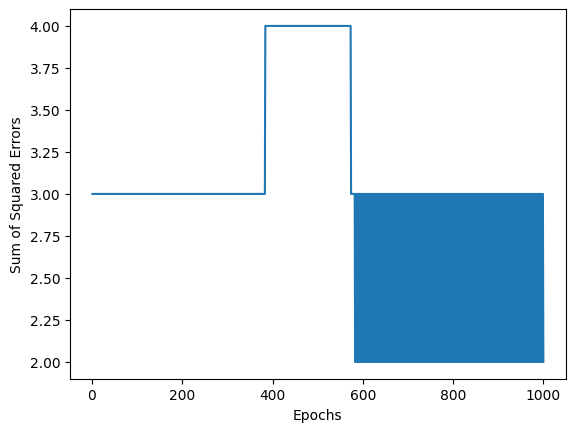

Final Weights: [ 5.2048 -5.1388 -5.134 ]
Number of Epochs: 1000


In [2]:
# Define initial weights and learning rate
W0 = 100
W1 = 0.29
W2 = -0.175
alpha = 0.0522

# Define step activation function
def step(x):
    return 1 if x >= 0 else 0

# Define predict function
def predict(row, weights):
    activation = weights[0] + np.dot(row, weights[1:])
    return step(activation)

# Define train_weights function
def train_weights(train, alpha, epochs):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(epochs):
        sum_error = 0
        for row in train:
            prediction = predict(row[:-1], weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += alpha * error
            weights[1:] += alpha * error * row[:-1]
        errors.append(sum_error)
        if sum_error <= 0.002:
            break
    return weights, errors

# Define sum_squared_error function
def sum_squared_error(train, weights):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights)
        error += (row[-1] - prediction)**2
    return error

# Define training data
train = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [1, 0, 0],
                  [1, 1, 1]])

# Train the perceptron and plot the epochs against the error values
weights, errors = train_weights(train, alpha, 1000)
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.show()

# Print the final weights and the number of epochs needed for convergence
print('Final Weights:', weights)
print('Number of Epochs:', len(errors))

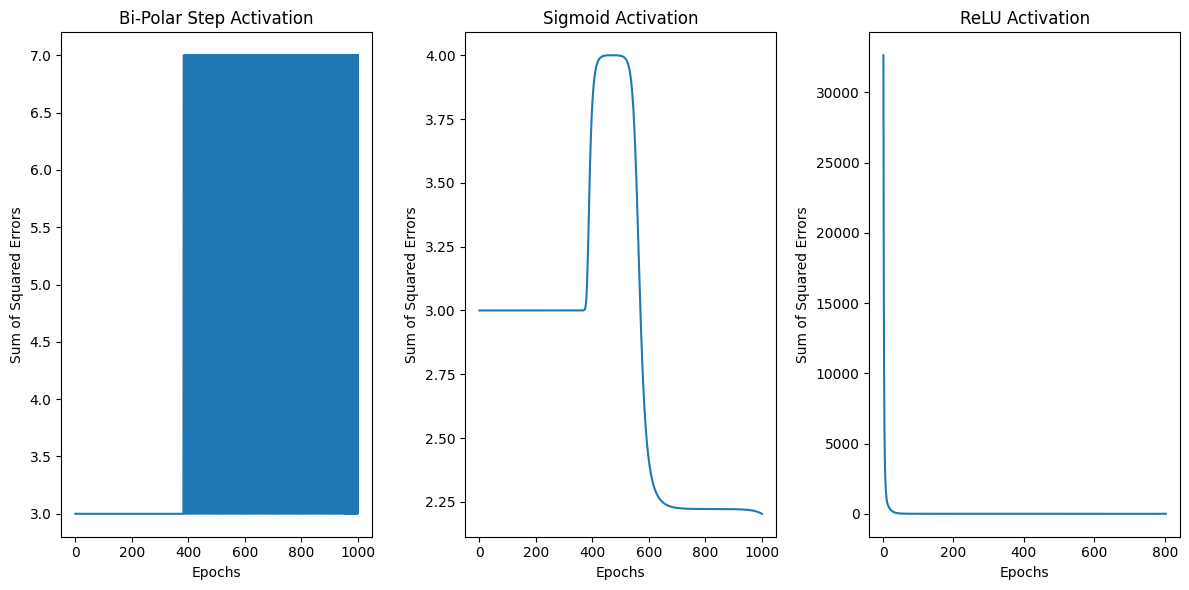

Final Weights: [-0.0152  0.1856  0.1382]
Number of Epochs: 1000
Final Weights: [ 4.80376524 -5.42336549 -5.44305644]
Number of Epochs: 1000
Final Weights: [-0.92793174  0.95139064  0.94998225]
Number of Epochs: 803


In [3]:
#A2

# Define Bi-Polar Step activation function
def bipolar_step(x):
    return -1 if x < 0 else 1

# Define Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define ReLU activation function
def relu(x):
    return max(0, x)

# Define predict function with the specified activation function
def predict(row, weights, activation_func):
    activation = weights[0] + np.dot(row, weights[1:])
    return activation_func(activation)

# Define train_weights function with the specified activation function
def train_weights(train, alpha, epochs, activation_func):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(epochs):
        sum_error = 0
        for row in train:
            prediction = predict(row[:-1], weights, activation_func)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += alpha * error
            weights[1:] += alpha * error * row[:-1]
        errors.append(sum_error)
        if sum_error <= 0.002:
            break
    return weights, errors

# Define sum_squared_error function
def sum_squared_error(train, weights, activation_func):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights, activation_func)
        error += (row[-1] - prediction)**2
    return error

# Define training data
train = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [1, 0, 0],
                  [1, 1, 1]])

# Perform the experiment with Bi-Polar Step activation function
weights_bipolar, errors_bipolar = train_weights(train, alpha, 1000, bipolar_step)

# Perform the experiment with Sigmoid activation function
weights_sigmoid, errors_sigmoid = train_weights(train, alpha, 1000, sigmoid)

# Perform the experiment with ReLU activation function
weights_relu, errors_relu = train_weights(train, alpha, 1000, relu)

# Plot the errors for each activation function
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(range(1, len(errors_bipolar) + 1), errors_bipolar)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Bi-Polar Step Activation')

plt.subplot(132)
plt.plot(range(1, len(errors_sigmoid) + 1), errors_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Sigmoid Activation')

plt.subplot(133)
plt.plot(range(1, len(errors_relu) + 1), errors_relu)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('ReLU Activation')

plt.tight_layout()
plt.show()

# Print the final weights and the number of epochs needed for convergence
print('Final Weights:', weights_bipolar)
print('Number of Epochs:', len(errors_bipolar))

print('Final Weights:', weights_sigmoid)
print('Number of Epochs:', len(errors_sigmoid))

print('Final Weights:', weights_relu)
print('Number of Epochs:', len(errors_relu))

In [11]:
#A3

# Define a range of learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of iterations for each learning rate
iterations_needed = []

# Set the maximum number of epochs and convergence threshold
max_epochs = 1000
convergence_threshold = 0.002

# Perform the experiment for each learning rate
for alpha in learning_rates:
    errors = train_weights(train, alpha, 1000, step)
    iterations_needed.append(len(errors))
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of iterations for each learning rate
iterations_needed = []

# Set the maximum number of epochs and convergence threshold
max_epochs = 1000
convergence_threshold = 0.002

# Perform the experiment for each learning rate
for alpha in learning_rates:
    errors = train_weights(train, alpha, 1000, step)
    iterations_needed.append(len(errors))

# Plot the number of iterations against the learning rates
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid(True)
plt.show()

# Plot the number of iterations against the learning rates
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid(True)
plt.show()

TypeError: ignored

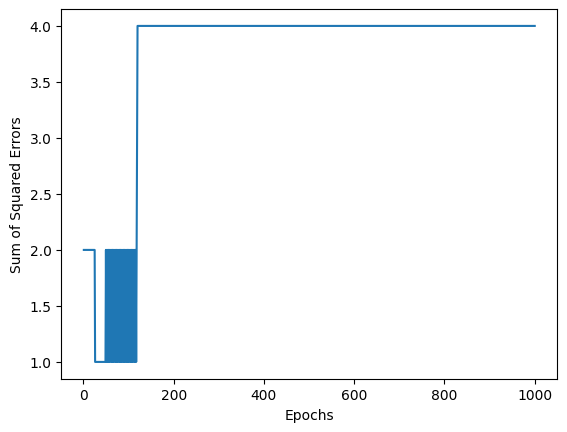

Final Weights: [ 2.    -2.71  -2.175]
Number of Epochs: 1000


In [5]:
#A4

# Define predict function
def predict(row, weights):
    activation = weights[0] + np.dot(row, weights[1:])
    return step(activation)

# Define train_weights function
def train_weights(train, alpha, epochs):
    weights = np.array([W0, W1, W2])
    errors = []
    for epoch in range(epochs):
        sum_error = 0
        for row in train:
            prediction = predict(row[:-1], weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] += alpha * error
            weights[1:] += alpha * error * row[:-1]
        errors.append(sum_error)
        if sum_error <= 0.002:
            break
    return weights, errors

# Define sum_squared_error function
def sum_squared_error(train, weights):
    error = 0
    for row in train:
        prediction = predict(row[:-1], weights)
        error += (row[-1] - prediction)**2
    return error

# Define training data
train = np.array([[0, 0, 0],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 0]])

# Train the perceptron and plot the epochs against the error values
weights, errors = train_weights(train, alpha, 1000)
plt.plot(range(1, len(errors)+1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.show()

# Print the final weights and the number of epochs needed for convergence
print('Final Weights:', weights)
print('Number of Epochs:', len(errors))